Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2023/2024  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Prva laboratorijska vježba: Linearna regresija

*Verzija: 1.0
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2023 Jan Šnajder, Domagoj Alagić

Rok za predaju: **22. listopada 2023. u 23:59h**

------------------------------

### Pravila predaje
Predajom vježbe potvrđujete sljedeće točke:
1. Niste od drugoga primili pomoć pri rješavanju vježbe;
2. Atribuirali ste dijelove koda koji su preuzeti s interneta referencirajući ih u komentarima;
3. Niste koristili dijelove koda s interneta koji su specifični za laboratorijsku vježbu;
4. Niste koristili UI-asistente za kodiranje kao npr. GitHub Copilot (uključivo alate generativne UI, kao što je ChatGPT).

**Povreda bilo kojeg od gornjih pravila smatra se prekršajem te povlači akademske sankcije.**

### Upute

Prva laboratorijska vježba sastoji se od sedam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija.

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# !!!!! VAZNO !!!!!
# Ponavljac sam ovog predmeta, stoga:
# Kod u nastavku labosa je moj kod iz ak.god. 22./23. s kojim sam bila zadovoljna/za koji sam dobila bodove
# Uz eventualne manje promjene/dodatke onoga sto nisam rijesila prosle godine
# (Prijenosa labosa nema na predmetu, ali smijemo braniti svoje stare labose :) )

# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [128]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [129]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(1)
m_design = poly.fit_transform(X)
print(m_design)

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 4.]]


### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [130]:
from numpy import linalg
from numpy import matrix
#print(numpy.version.version)
m_design_T = matrix.transpose(m_design)
#print(m_design_T)
weights1 = np.matmul(m_design_T, m_design)
#print(weights1)
weights2 = linalg.inv(weights1)
#print(weights2)
weights = np.matmul(weights2, m_design_T)
#print(weights)
w = np.matmul(weights, y)
print(w)
weights3 = linalg.pinv(m_design)
w_alt = np.matmul(weights3, y)
print(w_alt)

[2.2        0.45714286]
[2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

[2.2        0.45714286]
4.085714285714286


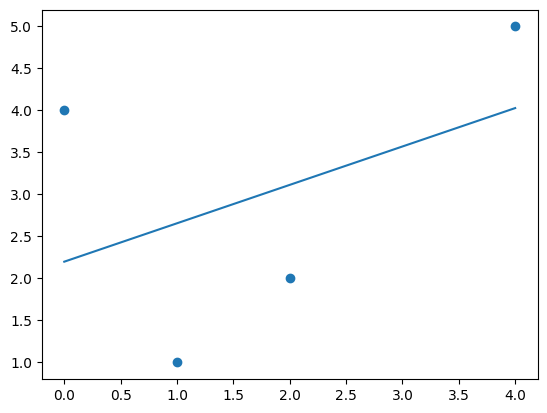

In [131]:
from sklearn.metrics import mean_squared_error
plt.scatter([0, 1, 2, 4], y)

w_T = matrix.transpose(w)
print(w_T)
def h(x_tilda): return np.matmul(w_T, matrix.transpose(x_tilda))

plt.plot([0, 1, 2, 4], h(m_design))
plt.show


pred = np.arange(4).astype(float)
#convertedArray = sampleArray.astype(np.float)
for i in range(4):
  #print(h(m_design[i]))
  pred[i]= h(m_design[i])
  #print(h(m_design[i]))
  #print(pred[i])

#print(pred)
N = 4
err = 4 *(sklearn.metrics.mean_squared_error(y, pred))/2
print(err)

### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [8]:
#w_temp = linalg.inv(m_design) #ne mozemo napraviti inverz matrice dizajna, ona je dimenzije 4x2
#w_alt2 = np.matmul(w_temp, y)

### (e)

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [9]:
from sklearn.linear_model import LinearRegression

model_1e = LinearRegression().fit(X, y)
print(model_1e.coef_)
print(model_1e.intercept_)
print(model_1e.predict(X))

[0.45714286]
2.2
[2.2        2.65714286 3.11428571 4.02857143]


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html).

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [13]:
from numpy.random import normal
def f_2a(x):
  return x - 2*x**2 - 5*x**3 + 5

def make_labels(X, f, noise=0):
  N = len(X)
  y = np.arange(N).astype(float)
  for i in range(N):
    y[i]= f(X[i][0]) + np.random.normal(0, noise^2)
  return y


In [14]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)]) #ovo generira  50 primjera u intervalu koji je zadan s x1 i x2, tu -5 i 5

In [15]:
X = make_instances(-5, 5, 50)
y = make_labels(X, f_2a, 200)

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

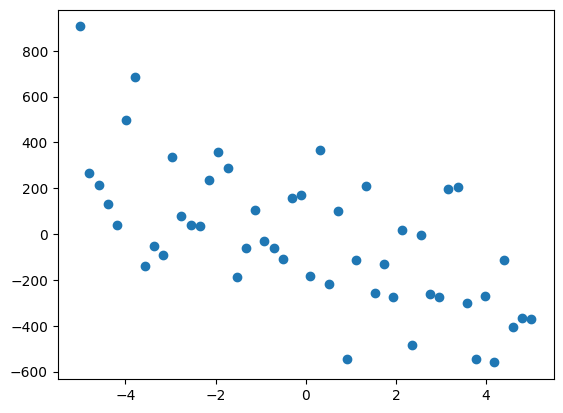

In [17]:
plt.scatter(X, y)
plt.show()

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

Vektor težina: 
[-30.4157215  -35.84033357   1.74820237  -2.02115607]
Greška je: 
1282617.011285877


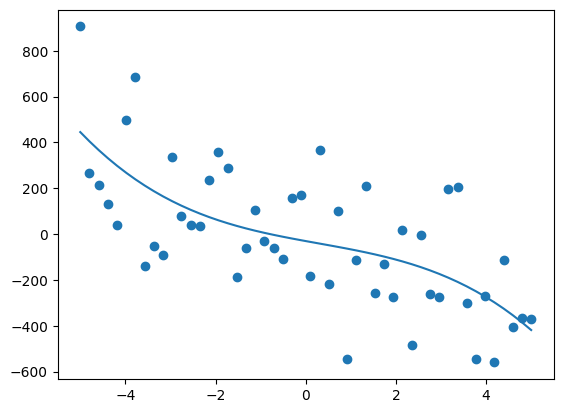

In [19]:
N = 50
z = np.zeros((50,2), dtype=float)
#print(z)
for i in range(N):
  z[i][0] = X[i][0]**2
  z[i][1] = X[i][0]**3
#print(z)
X1 = np.append(X, z, axis=1)
#print(X1)
poly2 = PolynomialFeatures(1)
m_design_2b = poly.fit_transform(X1)

w3 = linalg.pinv(m_design_2b)
w_2b = np.matmul(w3, y)
print('Vektor težina: ')
print(w_2b)
w_T2b = matrix.transpose(w_2b)
#print(w_T)
def h2b(x_tilda): return np.matmul(w_T2b, matrix.transpose(x_tilda))

pred2b = np.arange(N).astype(float)
#convertedArray = sampleArray.astype(float)
for i in range(N):

  pred2b[i]= h2b(m_design_2b[i])

#print(pred2b)
plt.scatter(X, y)
plt.plot(X, pred2b)
plt.show

#print(pred)

err = 50*(sklearn.metrics.mean_squared_error(y, pred2b))/2
print('Greška je: ')
print(err)



### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

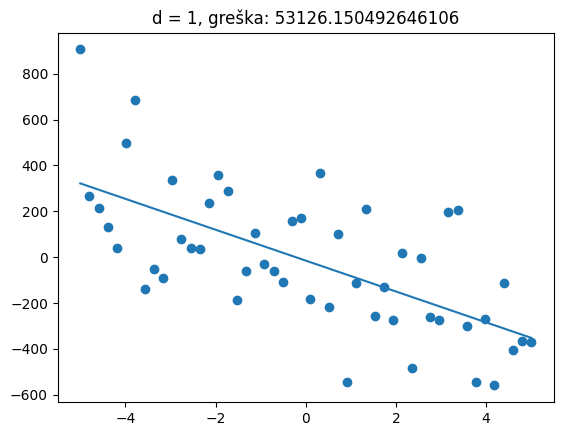

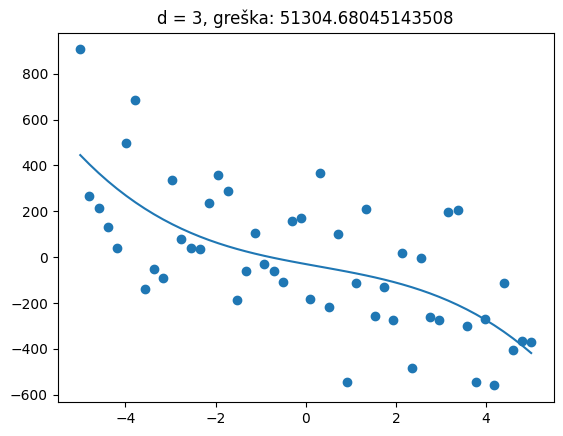

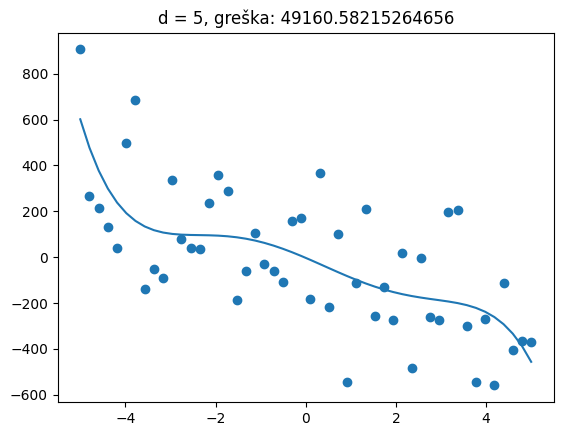

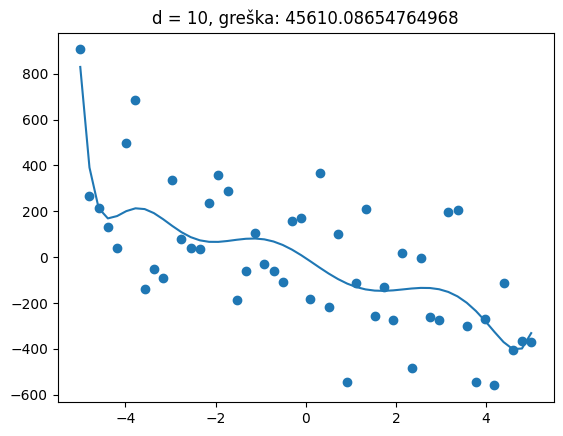

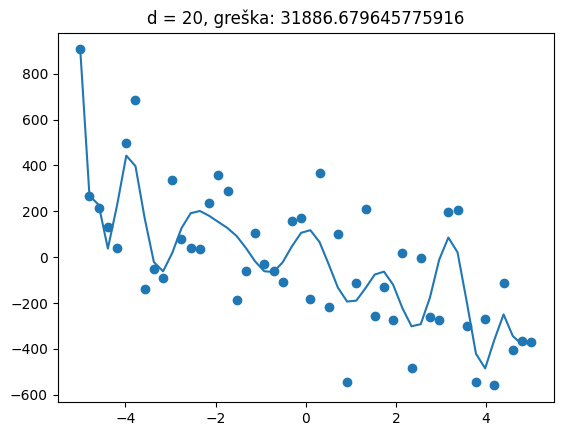

In [24]:
def hd(w_Td, x_tilda): return np.matmul(w_Td, matrix.transpose(x_tilda))

def poly_model(X, y, d, N): #X je ulaz, y labele, d stupnaj polinoma, N broj primjera (50 u 2.)
 # print('d = '+ str(d) +', N = '+ str(N))
  if d != 1:

    znum = d-1
    z = np.zeros((N,znum), dtype=float)
    pw = 2
    for i in range(N):
      for j in range(znum):
        z[i][j] = X[i][0]**pw
        pw+=1
      pw=2
    Xd = np.append(X, z, axis=1)

    poly2 = PolynomialFeatures(1)
    m_design_d = poly.fit_transform(Xd)

  if d == 1:
    m_design_d = poly.fit_transform(X)

  wd = linalg.pinv(m_design_d)
  w_d = np.matmul(wd, y)
  #print('Vektor težina: ')
  #print(w_d)
  w_Td = matrix.transpose(w_d)
  predd = np.arange(N).astype(float)

  for i in range(N):
    predd[i]= hd(w_Td, m_design_d[i])

  err = (sklearn.metrics.mean_squared_error(y, predd)) #obican mse funkcija, bez dijeljeno s 2

  #d = plt.scatter(X, y)
  #d = plt.scatter(X, predd)
  #plt.show(d)
  return err, w_Td , m_design_d, predd

e1, w_Td1, m_design_d1, predd1= poly_model(X, y, 1, 50)

e3, w_Td3, m_design_d3, predd3= poly_model(X, y, 3, 50)

e5, w_Td5, m_design_d5, predd5= poly_model(X, y, 5, 50)

e10, w_Td10, m_design_d10, predd10= poly_model(X, y, 10, 50)

e20, w_Td20, m_design_d20, predd20= poly_model(X, y, 20, 50)


d1 = plt.scatter(X, y)
d1=plt.plot(X, predd1)
d1=plt.title('d = 1, greška: '+ str(e1))
plt.show(d1)
d3 = plt.scatter(X, y)
d3=plt.plot(X, predd3)
d3=plt.title('d = 3, greška: '+ str(e3))
plt.show(d3)
d5 = plt.scatter(X, y)
d5=plt.plot(X, predd5)
d5=plt.title('d = 5, greška: '+ str(e5))
plt.show(d5)
d10 = plt.scatter(X, y)
d10=plt.plot(X, predd10)
d10=plt.title('d = 10, greška: '+ str(e10))
plt.show(d10)
d20 = plt.scatter(X, y)
d20=plt.plot(X, predd20)
d20=plt.title('d = 20, greška: '+ str(e20))
plt.show(d20)

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih dvadeset modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

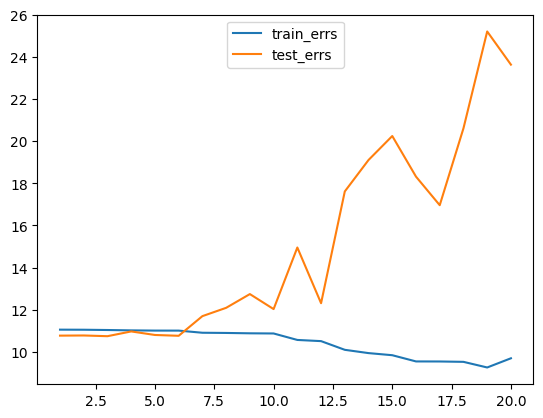

In [31]:
from sklearn.model_selection import train_test_split
#print(len(y_train))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=25)
#print(y_train)
train_errs = np.arange(20).astype(float)
test_errs = np.arange(20).astype(float)
ds = np.arange(20).astype(float)
for g in range(20):
  ds[g]= g+1

for i in range(20):
  n = i + 1
  train_err, wtd, m_des, train_pred = poly_model(X_train, y_train, n, 25)
  train_errs[i] = np.log(train_err)

  a, b, m_des_y, c = poly_model(X_test, y_test, n, 25) #koristimo da bi dobili mat dizajna za test, a,b,c nebitni
  test_pred = np.arange(25).astype(float)
  for k in range(25):
    test_pred[k] = hd(wtd, m_des_y[k])

  test_err = (sklearn.metrics.mean_squared_error(y_test, test_pred))
  test_errs[i] = np.log(test_err)
  #print(y_test)
  #print(test_err)


#print(test_errs)
#print(train_errs)
#print(ds)
graf=plt.plot(ds, train_errs, label="train_errs")
graf=plt.plot(ds, test_errs, label="test_errs")
graf=plt.legend(loc='upper center')
plt.show(graf)




#e= poly_model(X, y, 20, 50)
#print('Greška je:'+ str(e))

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

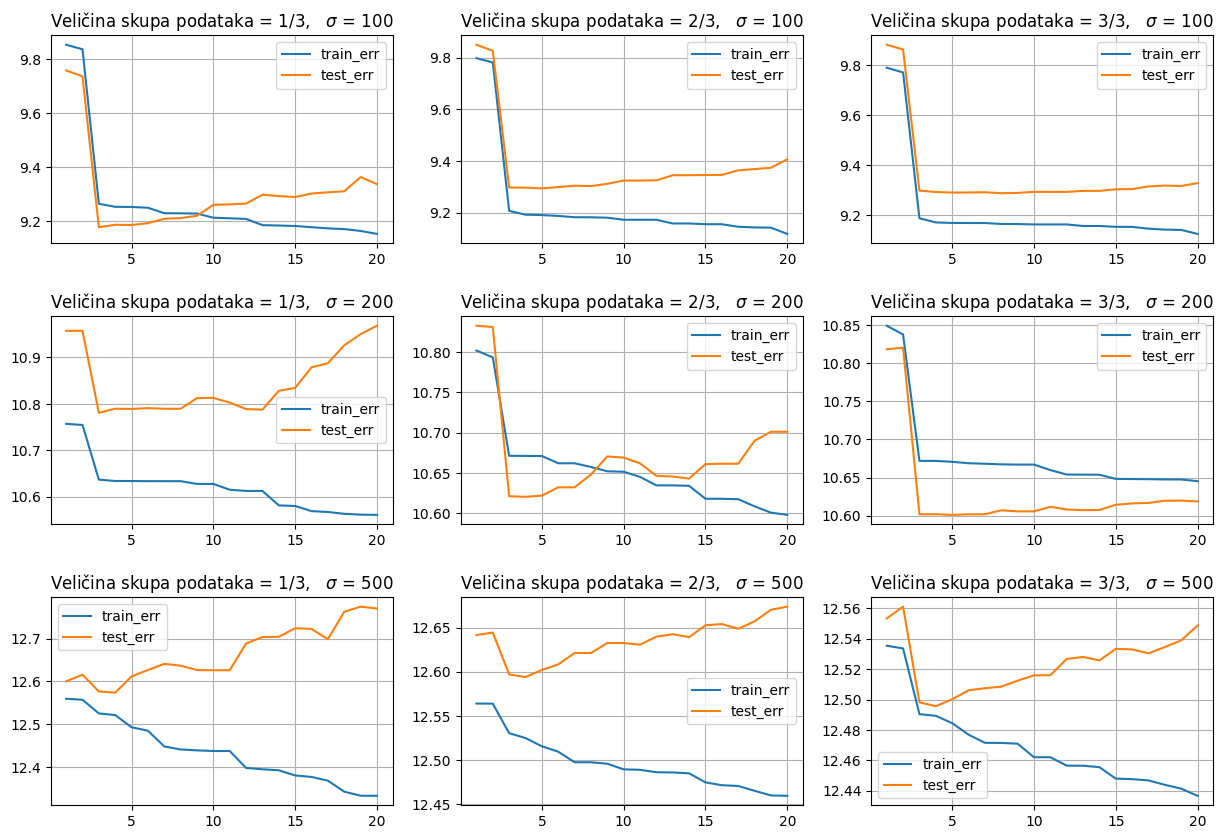

In [55]:
x_all = make_instances(-5, 5, 1000) #prvih 1000 podataka
X_all_train, X_all_test = train_test_split(x_all, test_size = 0.5) # 2 skupa od 500 podataka

#6 skupova podataka s različitim šumom, svaki ima 500 podataka - to su ovi sa svim podatcima
y_train100 = make_labels(X_all_train, f_2a, 100)
y_test100 = make_labels(X_all_test, f_2a, 100)

y_train200 = make_labels(X_all_train, f_2a, 200)
y_test200 = make_labels(X_all_test, f_2a, 200)

y_train500 = make_labels(X_all_train, f_2a, 500)
y_test500 = make_labels(X_all_test, f_2a, 500)

#treba jos uzorkovati 1/3 i 2/3 podataka
X_all_train13 = X_all_train[:167]
X_all_train23 = X_all_train[:333]

X_all_test13 = X_all_test[:167]
X_all_test23 = X_all_test[:333]

y_train10013 = y_train100[:167]
y_train10023 = y_train100[:333]
y_test10013 = y_test100[:167]
y_test10023 = y_test100[:333]

y_train20013 = y_train200[:167]
y_train20023 = y_train200[:333]
y_test20013 = y_test200[:167]
y_test20023 = y_test200[:333]

y_train50013 = y_train500[:167]
y_train50023 = y_train500[:333]
y_test50013 = y_test500[:167]
y_test50023 = y_test500[:333]



def cross(X_train, X_test, y_train, y_test, N):
  train_errs = np.arange(20).astype(float)
  test_errs = np.arange(20).astype(float)
  ds = np.arange(20).astype(float)
  for g in range(20):
    ds[g]= g+1

  for i in range(20):
    n = i + 1
    train_err, wtd, m_des, train_pred = poly_model(X_train, y_train, n, N)
    train_errs[i] = np.log(train_err)

    a, b, m_des_y, c = poly_model(X_test, y_test, n, N) #koristimo da bi dobili mat dizajna za test, a,b,c nebitni
    test_pred = np.arange(N).astype(float)
    for k in range(N):
      test_pred[k] = hd(wtd, m_des_y[k])

    test_err = (sklearn.metrics.mean_squared_error(y_test, test_pred))
    test_errs[i] = np.log(test_err)

  return train_errs, test_errs



train_errs_all = []
test_errs_all = []

train_err, test_err = cross(X_all_train13, X_all_test13, y_train10013, y_test10013, 167)
train_errs_all.append(train_err)
test_errs_all.append(test_err)

train_err, test_err = cross(X_all_train23, X_all_test23, y_train10023, y_test10023, 333)
train_errs_all.append(train_err)
test_errs_all.append(test_err)

train_err, test_err = cross(X_all_train, X_all_test, y_train100, y_test100, 500)
train_errs_all.append(train_err)
test_errs_all.append(test_err)

train_err, test_err = cross(X_all_train13, X_all_test13, y_train20013, y_test20013, 167)
train_errs_all.append(train_err)
test_errs_all.append(test_err)

train_err, test_err = cross(X_all_train23, X_all_test23, y_train20023, y_test20023, 333)
train_errs_all.append(train_err)
test_errs_all.append(test_err)

train_err, test_err = cross(X_all_train, X_all_test, y_train200, y_test200, 500)
train_errs_all.append(train_err)
test_errs_all.append(test_err)

train_err, test_err = cross(X_all_train13, X_all_test13, y_train50013, y_test50013, 167)
train_errs_all.append(train_err)
test_errs_all.append(test_err)

train_err, test_err = cross(X_all_train23, X_all_test23, y_train50023, y_test50023, 333)
train_errs_all.append(train_err)
test_errs_all.append(test_err)

train_err, test_err = cross(X_all_train, X_all_test, y_train500, y_test500, 500)
train_errs_all.append(train_err)
test_errs_all.append(test_err)


d = np.arange(20).astype(float)
for g in range(20):
  d[g]= g+1 #lista 1,2,3...20

graf = plt.figure(figsize=(15, 10))
graf.subplots_adjust(wspace=0.2, hspace = 0.35)

Ns = ['1/3', '2/3', '3/3', '1/3', '2/3', '3/3', '1/3', '2/3', '3/3']
sigme = [100, 100, 100, 200, 200, 200, 500, 500, 500]



for i in range(0, 9):
  ax = graf.add_subplot(3, 3, i+1)
  plt.plot(d, train_errs_all[i], d, test_errs_all[i])
  plt.legend(['train_err', 'test_err'], loc='best')
  plt.title('Veličina skupa podataka = %s,   $\sigma$ = %d' % (Ns[i], sigme[i]))
  ax.grid()






***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [56]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])
z = np.zeros((4,2), dtype=float)
#print(z)
for i in range(4):
  z[i][0] = X[i][0]**2
  z[i][1] = X[i][0]**3
#print(z)
X1 = np.append(X, z, axis=1)
#print(X1)
poly2 = PolynomialFeatures(1)
m_design_4a = poly.fit_transform(X1)
## lambda = 0
w0=linalg.pinv(m_design_4a)
wl0= np.matmul(w0, y)
print(wl0)
## lambda = 1
w1temp = matrix.transpose(m_design_4a)
#print(w1temp)
w1temp1 = np.matmul(w1temp, m_design_4a) #umnozak trans i fi

lambda1 = np.zeros((4, 4), dtype=float)
np.fill_diagonal(lambda1, 1)
lambda1[0][0]= 0.

lambda10 = np.zeros((4, 4), dtype=float)
np.fill_diagonal(lambda10, 10)
lambda10[0][0]= 0.
w11= w1temp1+lambda1

w111=linalg.inv(w11)
wl11=np.matmul(w111, w1temp)
wl1=np.matmul(wl11, y)

print(wl1)

w21= w1temp1+lambda10
w211=linalg.inv(w21)
wl21=np.matmul(w211, w1temp)
wl10=np.matmul(wl21, y)
print(wl10)
##lambda = 10

[ 4.         -5.91666667  3.375      -0.45833333]
[ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
[ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [57]:
from sklearn.linear_model import Ridge
clf0 = Ridge(alpha=0.0)
clf0.fit(m_design_4a, y)
print(clf0.coef_)
print(clf0.intercept_)

clf1 = Ridge(alpha=1.0)
clf1.fit(m_design_4a, y)
print(clf1.coef_)
print(clf1.intercept_)

clf10 = Ridge(alpha=10.0)
clf10.fit(m_design_4a, y)
print(clf10.coef_)
print(clf10.intercept_)

[ 0.         -5.91666667  3.375      -0.45833333]
4.000000000000034
[ 0.         -0.69079365 -0.2831746   0.1445805 ]
3.0569614512471652
[ 0.         -0.15897295 -0.13423067  0.0815601 ]
2.4944418431229725


### (c)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

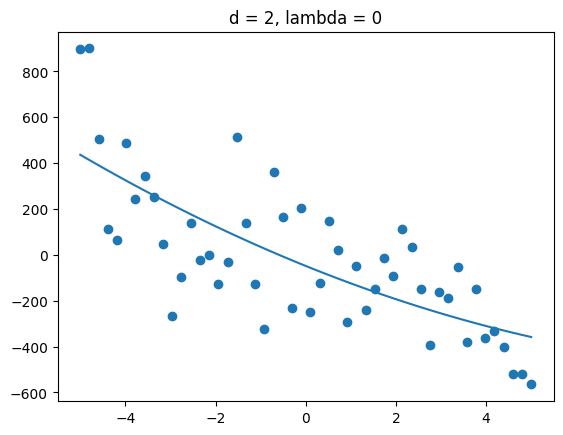

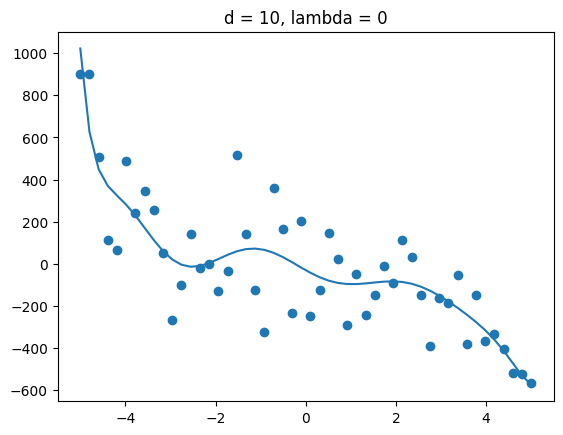

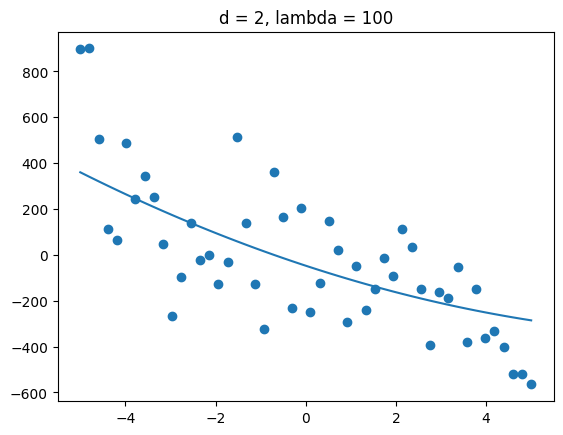

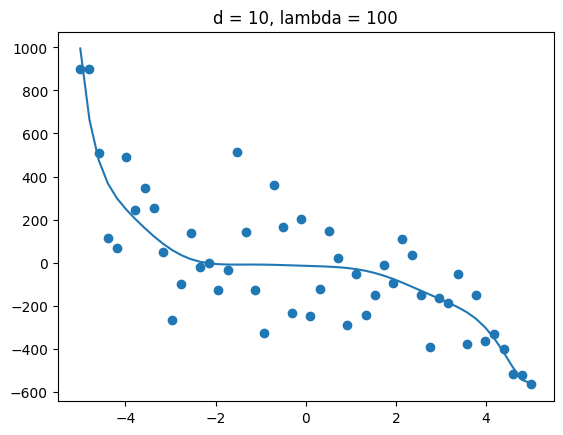

In [71]:
X4 = make_instances(-5, 5, 50)
y4 = make_labels(X4, f_2a, 200)

e0, w_Td0, m_design_d0, predd0= poly_model(X4, y4, 2, 50)
d0 =plt.scatter(X4,y4)
d0 =plt.plot(X4,predd0)
d0=plt.title('d = 2, lambda = 0')
plt.show(d0)

e10, w_Td10, m_design_d10, predd10= poly_model(X4, y4, 10, 50)
d10 =plt.scatter(X4,y4)
d10 =plt.plot(X4,predd10)
d10=plt.title('d = 10, lambda = 0')
plt.show(d10)

clf01 = Ridge(alpha=100.0)
clf01.fit(m_design_d0, y4)

wgts2 = clf01.coef_
wgts2[0]=clf01.intercept_
#print(wgts2)
pred210 = np.arange(50).astype(float)
for h in range(50):
  pred210[h]=np.matmul(wgts2, matrix.transpose(m_design_d0[h]))

d210 =plt.scatter(X4,y4)
d210 =plt.plot(X4,pred210)
d210=plt.title('d = 2, lambda = 100')
plt.show(d210)

clf02 = Ridge(alpha=100.0)
clf02.fit(m_design_d10, y4)

wgts10 = clf02.coef_
wgts10[0]=clf02.intercept_
#print(wgts2)
pred1010 = np.arange(50).astype(float)
for s in range(50):
  pred1010[s]=np.matmul(wgts10, matrix.transpose(m_design_d10[s]))

d1010 =plt.scatter(X4,y4)
d1010 =plt.plot(X4,pred1010)
d1010=plt.title('d = 10, lambda = 100')
plt.show(d1010)


### (d)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


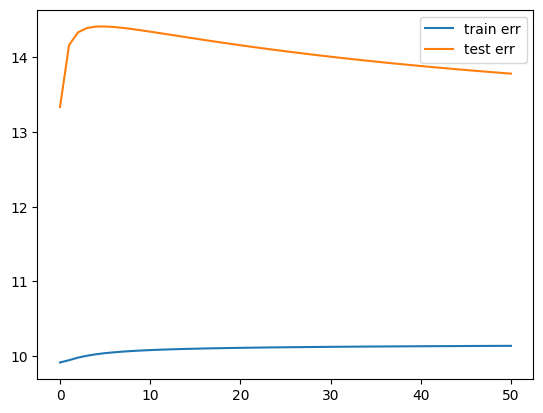

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X4, y4, test_size=25)
#print(y_train)
train_errs = np.arange(51).astype(float)
test_errs = np.arange(51).astype(float)
ds = np.arange(51).astype(float)
for g in range(51):
  ds[g]= g

for i in range(51):
  n = 10
  lam = float(i)
  train_err1, wtd, m_des, train_pred = poly_model(X_train, y_train, n, 25) #treba nam samo mat design

  clf4d = Ridge(alpha=lam)
  clf4d.fit(m_des, y_train)

  wgts = clf4d.coef_
  wgts[0]=clf4d.intercept_

  a, b, m_des_y, c = poly_model(X_test, y_test, n, 25) #koristimo da bi dobili mat dizajna za test, a,b,c nebitni

  train_pred = np.arange(25).astype(float)
  test_pred = np.arange(25).astype(float)
  for k in range(25):
    train_pred[k] = hd(wgts, m_des[k])
    test_pred[k] = hd(wgts, m_des_y[k])

  train_err = (sklearn.metrics.mean_squared_error(y_train, train_pred))
  train_errs[i] = np.log(train_err)

  test_err = (sklearn.metrics.mean_squared_error(y_test, test_pred))
  test_errs[i] = np.log(test_err)



plt.plot(ds, train_errs, label ='train err')
plt.plot(ds, test_errs, label ='test err')
plt.legend(loc='best')
plt.show()

### 5. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [70]:
def nonzeroes(coef, tol=1e-6):
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

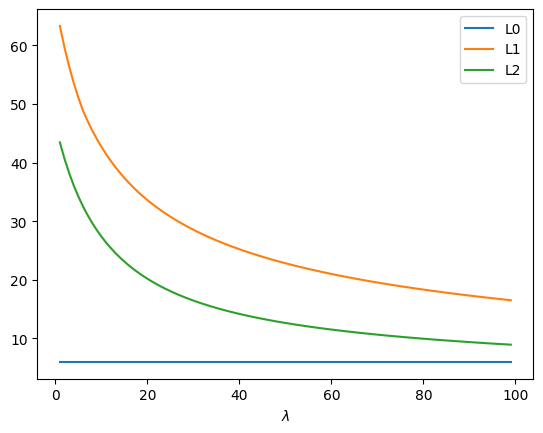

In [97]:
X = make_instances(-5, 5, 50)
y = make_labels(X, f_2a, 200) #iz 2. zad, split za 3b
lambde = range(1,100)
d = 5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=25)

Xpoly_train = PolynomialFeatures(d).fit_transform(X_train.reshape(-1,1))



def L1n(a):
  return sum(abs(a))

def L2n(a):
  return np.sqrt(np.dot(a.T, a))

L0 = []
L1 = []
L2 = []

for i in lambde:
  xx = np.dot(Xpoly_train.T, Xpoly_train)
  xx += i* np.eye(6)
  invx = np.linalg.inv(xx)

  wg = np.dot(invx, Xpoly_train.T)
  wgts= np.dot(wg, y_train)

  L0.append(nonzeroes(wgts))
  L1.append(L1n(wgts))
  L2.append(L2n(wgts))

plt.plot(lambde, L0, label ='L0')
plt.plot(lambde, L1, label ='L1')
plt.plot(lambde, L2, label ='L2')
plt.legend(loc='best')
plt.xlabel('$\lambda$')
plt.show()

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.478e+03, tolerance: 3.081e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.091e+02, tolerance: 3.081e+02
  model = cd_fast.enet_coordinate_descent(


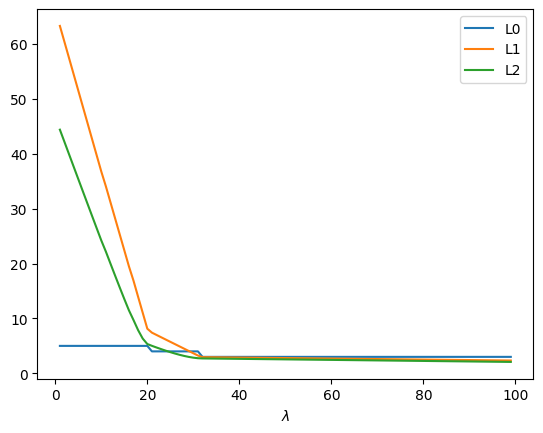

In [98]:
# Vaš kôd ovdje...
from sklearn.linear_model import Lasso

L0 = []
L1 = []
L2 = []

for i in lambde:
  lass = Lasso(alpha = i).fit(Xpoly_train, y_train)

  wgts = lass.coef_

  L0.append(nonzeroes(wgts))
  L1.append(L1n(wgts))
  L2.append(L2n(wgts))


plt.plot(lambde, L0, label ='L0')
plt.plot(lambde, L1, label ='L1')
plt.plot(lambde, L2, label ='L2')
plt.legend(loc='best')
plt.xlabel('$\lambda$')
plt.show()

### 6. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [115]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points)
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

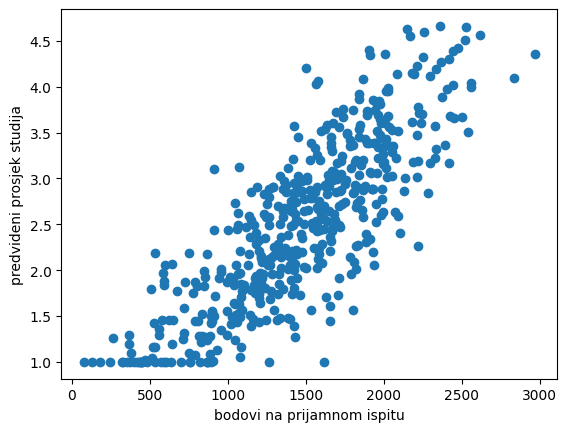

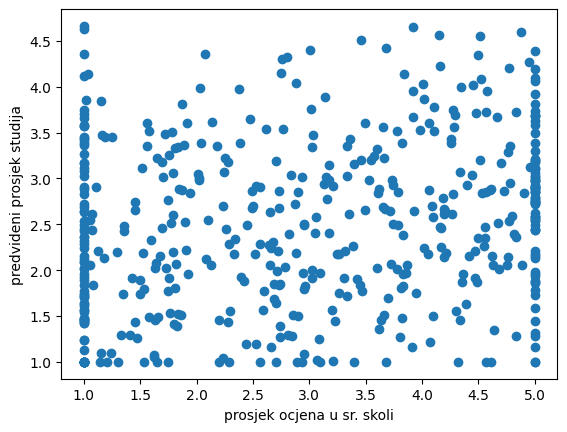

In [116]:
prva = plt.scatter(exam_score, grades_y)
prva = plt.xlabel('bodovi na prijamnom ispitu')
prva = plt.ylabel('predvideni prosjek studija')

plt.show(prva)

druga = plt.scatter(grade_in_highschool, grades_y)
druga = plt.xlabel('prosjek ocjena u sr. skoli')
druga = plt.ylabel('predvideni prosjek studija')

plt.show(druga)

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [117]:
model6b = Ridge(alpha=0.01)
model6b.fit(grades_X, grades_y)
print(model6b.coef_)
print(model6b.intercept_)

[0.00141497 0.09477276]
0.15061179575776018


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [118]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

grades_X_fixed = scaler.fit_transform(grades_X)
grades_y_fixed = scaler.fit_transform(grades_y.reshape(-1, 1))

model6b2 = Ridge(alpha=0.01)
model6b2.fit(grades_X_fixed, grades_y_fixed)
print(model6b2.coef_)
print(model6b2.intercept_)

[[0.81630375 0.15167761]]
[8.62551331e-17]


**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 7. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [120]:
stupac = grades_X_fixed[:, -1]
grades_X_fixed_colinear = np.column_stack((grades_X_fixed, stupac))
#print(grades_X_fixed_colinear)

[[ 0.95063817 -0.78607869 -0.78607869]
 [-0.50343434 -0.50193004 -0.50193004]
 [ 1.18596832 -0.52213172 -0.52213172]
 ...
 [-0.31593552  0.80074234  0.80074234]
 [ 0.81288393  1.24783236  1.24783236]
 [-0.01938126  1.21729714  1.21729714]]


Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [121]:
model7a = Ridge(alpha=0.01)
model7a.fit(grades_X_fixed_colinear, grades_y_fixed)
print(model7a.coef_)
print(model7a.intercept_)

[[0.81630364 0.07583957 0.07583957]]
[8.6255971e-17]


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [127]:
w11=[]
w12=[]
w13=[]
w21=[]
w22=[]
w23=[]


for i in range(10):
  print('Eksperiment '+ str(i+1))
  random_indices = np.random.choice(grades_X_fixed_colinear.shape[0], size=int(0.5 * grades_X_fixed_colinear.shape[0]), replace=False)
  X_train = grades_X_fixed_colinear[random_indices]
  y_train = grades_y_fixed[random_indices]
  print('lambda = 0.01')
  model7b1 = Ridge(alpha=0.01)
  model7b1.fit(X_train, y_train)
  weights1 = model7b1.coef_
  print(weights1)
  print('lambda = 1000')
  model7b2 = Ridge(alpha=1000)
  model7b2.fit(X_train, y_train)
  weights2 = model7b2.coef_
  print(weights2)
  w11.append(weights1[0][0])
  w12.append(weights1[0][1])
  w13.append(weights1[0][2])
  w21.append(weights2[0][0])
  w22.append(weights2[0][1])
  w23.append(weights2[0][2])
  print()

print('stddev za w1 i lambda = 0.01: '+str(np.std(w11)))
print('stddev za w2 i lambda = 0.01: '+str(np.std(w12)))
print('stddev za w3 i lambda = 0.01: '+str(np.std(w13)))
print()
print('stddev za w1 i lambda = 1000: '+str(np.std(w21)))
print('stddev za w2 i lambda = 1000: '+str(np.std(w22)))
print('stddev za w3 i lambda = 1000: '+str(np.std(w23)))

Eksperiment 1
lambda = 0.01
[[0.86330523 0.09236536 0.09236536]]
lambda = 1000
[[0.17062716 0.03315458 0.03315458]]

Eksperiment 2
lambda = 0.01
[[0.82110149 0.06150343 0.06150343]]
lambda = 1000
[[0.16722769 0.0242736  0.0242736 ]]

Eksperiment 3
lambda = 0.01
[[0.80017609 0.07808077 0.07808077]]
lambda = 1000
[[0.16423851 0.02685663 0.02685663]]

Eksperiment 4
lambda = 0.01
[[0.86553041 0.04971327 0.04971327]]
lambda = 1000
[[0.15210361 0.01863094 0.01863094]]

Eksperiment 5
lambda = 0.01
[[0.79460168 0.09207016 0.09207016]]
lambda = 1000
[[0.16307304 0.04651042 0.04651042]]

Eksperiment 6
lambda = 0.01
[[0.81407716 0.08741087 0.08741087]]
lambda = 1000
[[0.155506  0.0331135 0.0331135]]

Eksperiment 7
lambda = 0.01
[[0.79086471 0.0679438  0.0679438 ]]
lambda = 1000
[[0.14061222 0.0329342  0.0329342 ]]

Eksperiment 8
lambda = 0.01
[[0.87611721 0.06348304 0.06348304]]
lambda = 1000
[[0.16562706 0.02673694 0.02673694]]

Eksperiment 9
lambda = 0.01
[[0.79650229 0.07263469 0.07263469]]
la

**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.